This jupyter Notebookcreates new variables by using variables from https://www.worldvaluessurvey.org/WVSDocumentationWV7.jsp. This particular notebook will demonstrate creation of four new variables with variable codes Q30, Q188, Q197, and Q196. More thorough detail of the whole process and tests can be found in the other notebook entitled (project1_experimentdata.ipynb). These variables will be stored in a single dataframe at the end.

Please note: All of the four variables of interest are originally ordinal variables that have been treated as numerical variables. Thus, we need to be cautious of the downsides of such assumptions. "This approach requires the assumption that the numerical distance between each set of subsequent categories is equal.If that assumption is very close to reality–the distances are approximately equal–then analyses based on these numbers will render results that are very close to reality.  This assumption is sometimes very close and sometimes so far away. It’s unwise to assume it’s reasonable without some consideration." (The Analysis Factor). Other methods such as **polynomial contrast** of ordinal variables can be looked into more detail for future analysis to test out whether ordinal variables can be used as numerical variables with linear relationships to proportion of social learners.

While I haven't explained the whole process in detail. In the future, I can not only document the code properly but automate the whole process of appending variables by simply passing a parameter if this work is beneficial.

**Variable description**

**Q196** Government has the right: Keep people under video surveillance in public areas (WVS - 7)

Do you think this country’s government should or should not have the right to do the
following: Keep people under video surveillance in public areas  
1.- Definitely should have the right  
2.- Probably should have the right  
3.- Probably should not have the right   
4.- Definitely should not have the right   
-1-.- Don ́t know  
-2-.- No answer  
-4-.- Not asked  
-5-.- Missing; Not available  

**Q197**  
Do you think this country’s government should or should not have the right to do the following: Monitor all emails and any other information exchanged on the Internet  
1.- Definitely should have the right  
2.- Probably should have the right  
3.- Probably should not have the right   
4.- Definitely should not have the right   
-1-.- Don ́t know  
-2-.- No answer  
-4-.- Not asked  
-5-.- Missing; Not available  

**Q188**
Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card.  
Euthanasia  
1.- Never justifiable  
2.- 2  
3.- 3  
4.- 4  
5.- 5  
6.- 6  
7.- 7  
8.- 8  
9.- 9  
10.- Always justifiable   
-1-.- Don ́t know  
-2-.- No answer  
-4-.- Not asked in survey  
-5-.- Missing; Not available  

**Q30 - University is more important for a boy than for a girl**  
For each of the following statements I read out, can you tell me how much you agree with each. Do you agree strongly, agree, disagree, or disagree strongly? - A university education is more important for a boy than for a girl  
1.- Agree strongly 2.- Agree  
3.- Disagree  
4.- Strongly disagree   
-1-.- Don ́t know  
2-.- No answer  
-4-.- Not asked  
-5-.- Missing; Not available  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1860/3442601353.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


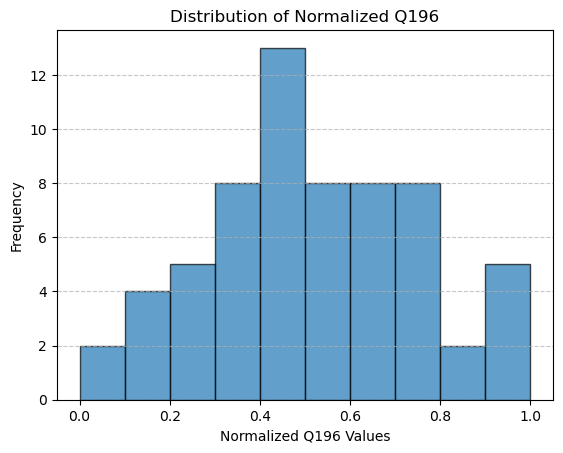

In [3]:
country_Q196 = data[['B_COUNTRY_ALPHA','Q196']]
# remove missing values 
country_Q196 = country_Q196[country_Q196.Q196 > 0]
#grouping by country name and mean of Q196 by country calculated as well
grouped = country_Q196.groupby('B_COUNTRY_ALPHA')['Q196'].mean().reset_index()
# Normalize 'Q196' within each country
grouped['Normalized_Q196'] = (grouped['Q196'] - grouped['Q196'].min()) / (grouped['Q196'].max() - grouped['Q196'].min())

plt.hist(grouped['Normalized_Q196'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Normalized Q196')
plt.xlabel('Normalized Q196 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

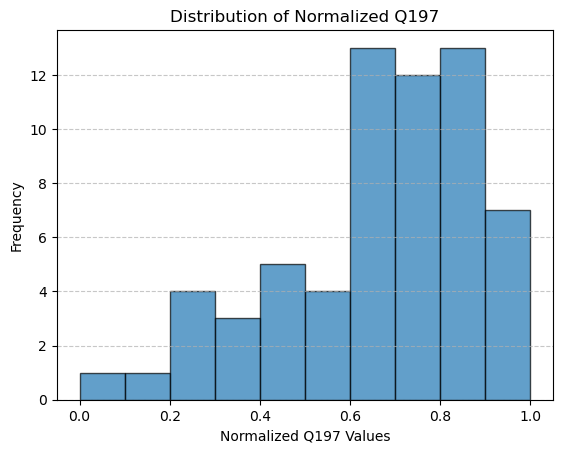

In [4]:
#follow the same steps as Q196: also, the whole process can be automated if useful for the future
country_Q197 = data[['B_COUNTRY_ALPHA','Q197']]
country_Q197 = country_Q197[country_Q197.Q197 > 0]
grouped197 = country_Q197.groupby('B_COUNTRY_ALPHA')['Q197'].mean().reset_index()
# Normalize 'Q197' within each country
grouped197['Normalized_Q197'] = (grouped197['Q197'] - grouped197['Q197'].min()) / (grouped197['Q197'].max() - grouped197['Q197'].min())

plt.hist(grouped197['Normalized_Q197'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Normalized Q197')
plt.xlabel('Normalized Q197 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

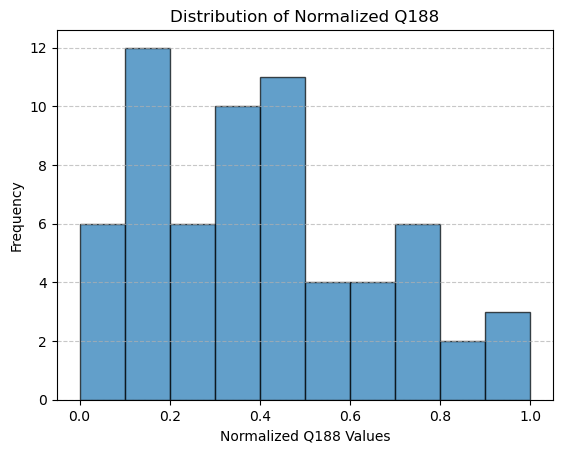

In [5]:
country_Q188 = data[['B_COUNTRY_ALPHA','Q188']]
country_Q188 = country_Q188[country_Q188.Q188 > 0]
grouped188 = country_Q188.groupby('B_COUNTRY_ALPHA')['Q188'].mean().reset_index()

# Normalize 'Q188' within each country
grouped188['Normalized_Q188'] = (grouped188['Q188'] - grouped188['Q188'].min()) / (grouped188['Q188'].max() - grouped188['Q188'].min())

plt.hist(grouped188['Normalized_Q188'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Normalized Q188')
plt.xlabel('Normalized Q188 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

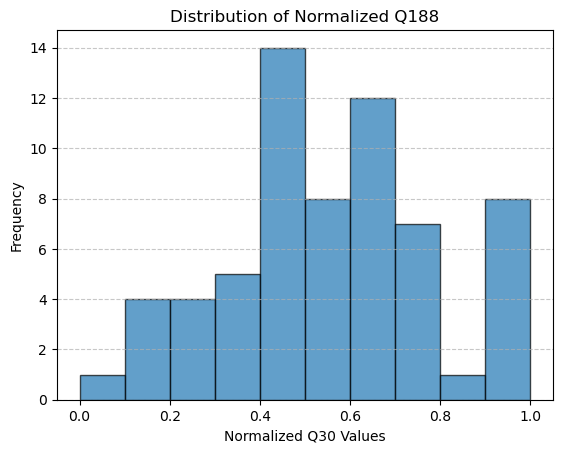

In [6]:
country_Q30 = data[['B_COUNTRY_ALPHA','Q30']]
country_Q30 = country_Q30[country_Q30.Q30 > 0]
grouped30 = country_Q30.groupby('B_COUNTRY_ALPHA')['Q30'].mean().reset_index()

# Normalize 'Q30' within each country
grouped30['Normalized_Q30'] = (grouped30['Q30'] - grouped30['Q30'].min()) / (grouped30['Q30'].max() - grouped30['Q30'].min())

plt.hist(grouped30['Normalized_Q30'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Normalized Q188')
plt.xlabel('Normalized Q30 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
merged_df = grouped30.merge(grouped188, on='B_COUNTRY_ALPHA',how='outer')
merged_df = merged_df.merge(grouped, on='B_COUNTRY_ALPHA',how='outer')

merged_df = merged_df.merge(grouped197, on='B_COUNTRY_ALPHA',how='outer')

merged_df.drop(columns=['Q30','Q188','Q197','Q196'],inplace=True)
merged_df

,B_COUNTRY_ALPHA,Normalized_Q30,Normalized_Q188,Normalized_Q196,Normalized_Q197
0,AND,0.936109,0.783438,0.495984,1.000000
1,ARG,0.724148,0.416871,0.710563,0.794133
2,ARM,0.638145,0.196940,0.725170,0.664782
3,AUS,1.000000,0.862535,0.227090,0.654069
4,BGD,0.241884,0.246841,0.098362,0.275707
...,...,...,...,...,...
59,URY,0.706467,0.670357,0.539748,0.892266
60,USA,0.777976,0.657193,0.467939,0.786642
61,VEN,0.597366,0.334159,0.790295,0.903890
62,VNM,0.368215,0.578331,0.703741,0.863132


In [8]:
merged_df[merged_df.Normalized_Q196.isna()]

,B_COUNTRY_ALPHA,Normalized_Q30,Normalized_Q188,Normalized_Q196,Normalized_Q197
15,EGY,0.541923,0.057237,NaN,NaN


**Egypt** is missing values for Q196 and Q197.

In [9]:
# #Sample code snippet of polynomial contrast for an ordinal variable

# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

# # Sample data
# ordinal_variable = np.array([1, 2, 3, 4])  # Ordinal variable (1 to 4)
# outcome_variable = np.array([5, 8, 6, 2])  # Example outcome variable

# # Create polynomial features
# degree = 3  # You can adjust the degree as needed
# poly_features = PolynomialFeatures(degree=degree)
# X_poly = poly_features.fit_transform(ordinal_variable.reshape(-1, 1))

# # Fit a polynomial regression model
# model = LinearRegression()
# model.fit(X_poly, outcome_variable)

# # Test linear contrast
# linear_contrast = np.array([[0, 1, 0, 0]])  # Linear contrast: [0, 1, 0, 0]
# linear_test_statistic = np.dot(linear_contrast, model.coef_)
# linear_test_statistic /= np.sqrt(np.sum(model.coef_ ** 2))  # Normalize

# # Test quadratic contrast
# quadratic_contrast = np.array([[0, 0, 1, 0]])  # Quadratic contrast: [0, 0, 1, 0]
# quadratic_test_statistic = np.dot(quadratic_contrast, model.coef_)
# quadratic_test_statistic /= np.sqrt(np.sum(model.coef_ ** 2))  # Normalize

# # Print test statistics
# print(f"Linear Test Statistic: {linear_test_statistic[0]:.4f}")
# print(f"Quadratic Test Statistic: {quadratic_test_statistic[0]:.4f}")


In [12]:
individual_collective = pd.read_csv('6-dimensions-for-website-2015-08-16.csv',sep=';', na_values='#NULL!')


,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,Africa East,64.0,27.0,41.0,52.0,32.0,40.0
1,AFW,Africa West,77.0,20.0,46.0,54.0,9.0,78.0
2,ALB,Albania,NaN,NaN,NaN,NaN,61.0,15.0
3,ALG,Algeria,NaN,NaN,NaN,NaN,26.0,32.0
4,AND,Andorra,NaN,NaN,NaN,NaN,NaN,65.0
...,...,...,...,...,...,...,...,...
106,URU,Uruguay,61.0,36.0,38.0,100.0,26.0,53.0
107,VEN,Venezuela,81.0,12.0,73.0,76.0,16.0,100.0
108,VIE,Vietnam,70.0,20.0,40.0,30.0,57.0,35.0
109,ZAM,Zambia,NaN,NaN,NaN,NaN,30.0,42.0


In [13]:
individual_collective.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ctr      111 non-null    object 
 1   country  111 non-null    object 
 2   pdi      78 non-null     float64
 3   idv      78 non-null     float64
 4   mas      78 non-null     float64
 5   uai      78 non-null     float64
 6   ltowvs   96 non-null     float64
 7   ivr      97 non-null     float64
dtypes: float64(6), object(2)
memory usage: 7.1+ KB


In [14]:
individual_collective.describe()

,pdi,idv,mas,uai,ltowvs,ivr
count,78.000000,78.000000,78.000000,78.000000,96.000000,97.000000
mean,59.333333,45.166667,49.269231,67.641026,45.489583,45.391753
std,21.223405,23.971529,19.007636,22.992926,24.221345,22.177108
min,11.000000,6.000000,5.000000,8.000000,0.000000,0.000000
25%,42.500000,23.500000,40.000000,51.250000,25.750000,29.000000
50%,62.000000,43.500000,48.500000,69.500000,44.500000,43.000000
75%,72.500000,67.750000,61.750000,86.000000,63.250000,63.000000
max,104.000000,91.000000,110.000000,112.000000,100.000000,100.000000


**Individualism (idv)**: This dimension reflects the degree to which people in a society are integrated into groups. A higher score indicates a more individualistic culture, where individuals are expected to take care of themselves and their immediate families. 

Quite a few missing values in idv.  
normalized idv is not only idv normalized to a scale 0-1 but also inverted,i.e, strong individualistic countries are closer to zero and vice-versa. This is done to be consistent with past experiments

In [34]:
individual_collective[individual_collective.ctr == 'SWE']

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr,normalized_idv
94,SWE,Sweden,31.0,71.0,5.0,29.0,53.0,78.0,0.235294


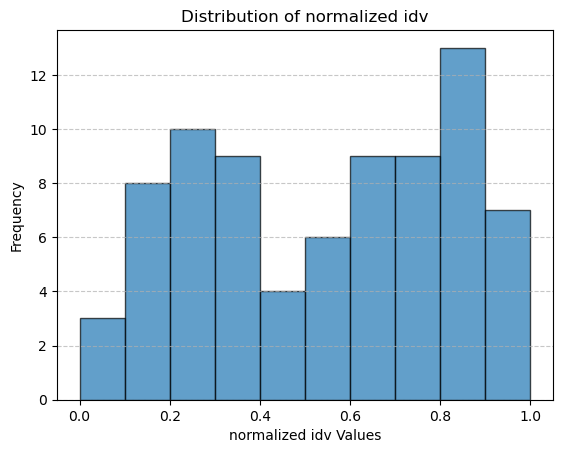

In [17]:
individual_collective['normalized_idv'] = 1 - (individual_collective['idv'] - individual_collective['idv'].min()) / (individual_collective['idv'].max() - individual_collective['idv'].min())

plt.hist(individual_collective['normalized_idv'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of normalized idv')
plt.xlabel('normalized idv Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
ic_list_na = individual_collective[individual_collective.ctr.isin( merged_df.B_COUNTRY_ALPHA)]
final_list = ic_list_na[~ic_list_na.normalized_idv.isna()]
final_list.drop(columns=['country','pdi','idv','mas','uai','ltowvs','ivr'],inplace=True)
final_list.rename(columns={'ctr': 'B_COUNTRY_ALPHA'}, inplace=True)
merged_df = merged_df.merge(final_list, on='B_COUNTRY_ALPHA',how='outer')
merged_df = merged_df[~merged_df.normalized_idv.isna()]
merged_df

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1860/917319760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_list.drop(columns=['country','pdi','idv','mas','uai','ltowvs','ivr'],inplace=True)
/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1860/917319760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_list.rename(columns={'ctr': 'B_COUNTRY_ALPHA'}, inplace=True)


,B_COUNTRY_ALPHA,Normalized_Q30,Normalized_Q188,Normalized_Q196,Normalized_Q197,normalized_idv
1,ARG,0.724148,0.416871,0.710563,0.794133,0.529412
6,BRA,0.664228,0.312862,0.565320,0.826292,0.623529
7,CAN,0.910211,0.790624,0.660946,0.885226,0.129412
8,CHL,0.534006,0.468954,0.684169,0.822840,0.800000
10,COL,0.477142,0.409248,0.503022,0.690046,0.917647
12,CZE,0.547918,0.764829,0.816929,0.946202,0.388235
17,GBR,0.972301,0.871027,0.382408,0.768657,0.023529
25,JPN,0.620962,0.782998,0.545658,0.671632,0.529412
29,KOR,0.366606,0.507684,0.687414,0.781535,0.858824
35,MEX,0.611439,0.402740,0.666546,0.818193,0.717647


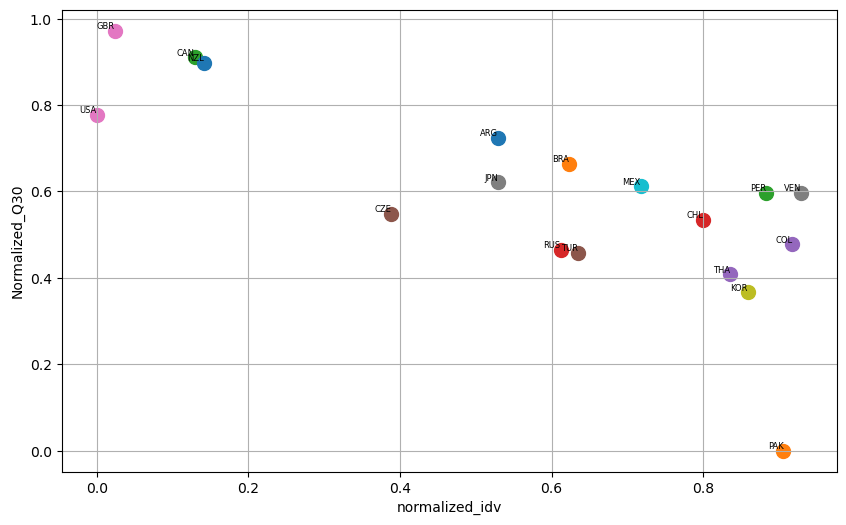

In [33]:

plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['Normalized_Q30'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['Normalized_Q30'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('Normalized_Q30')



# Show the plot
plt.grid()

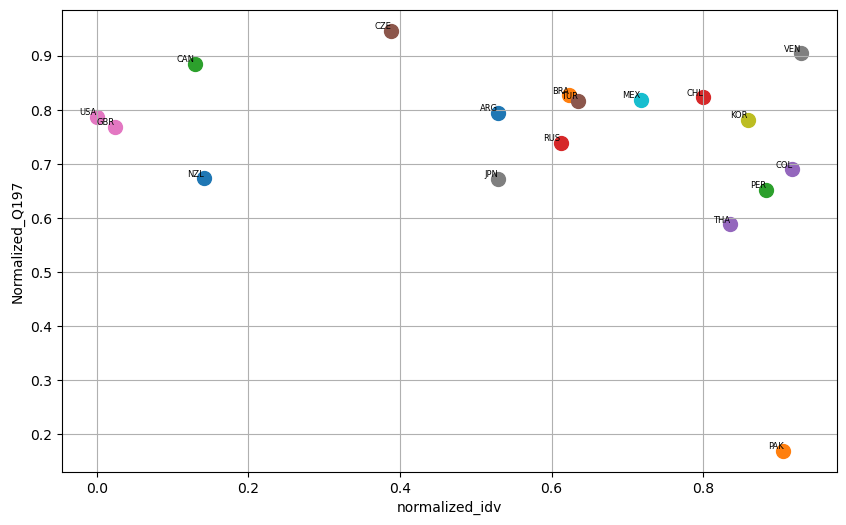

In [35]:

plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['Normalized_Q197'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['Normalized_Q197'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('Normalized_Q197')



# Show the plot
plt.grid()

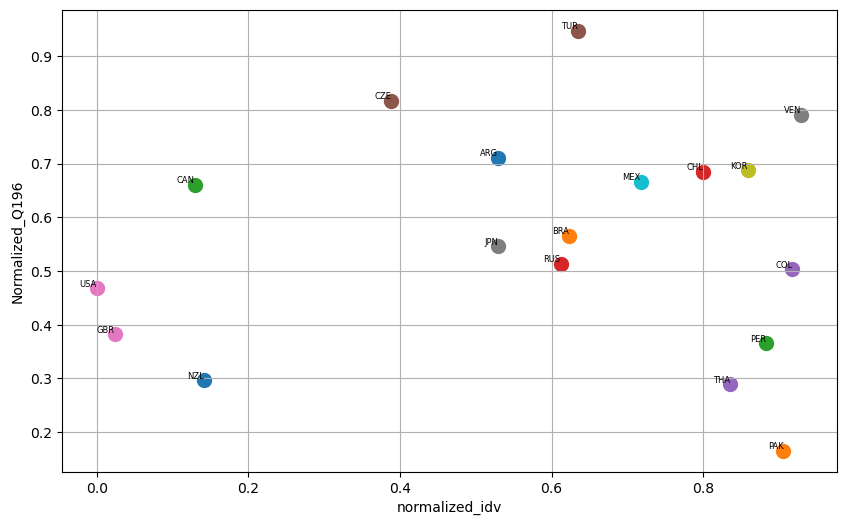

In [36]:

plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['Normalized_Q196'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['Normalized_Q196'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('Normalized_Q196')



# Show the plot
plt.grid()

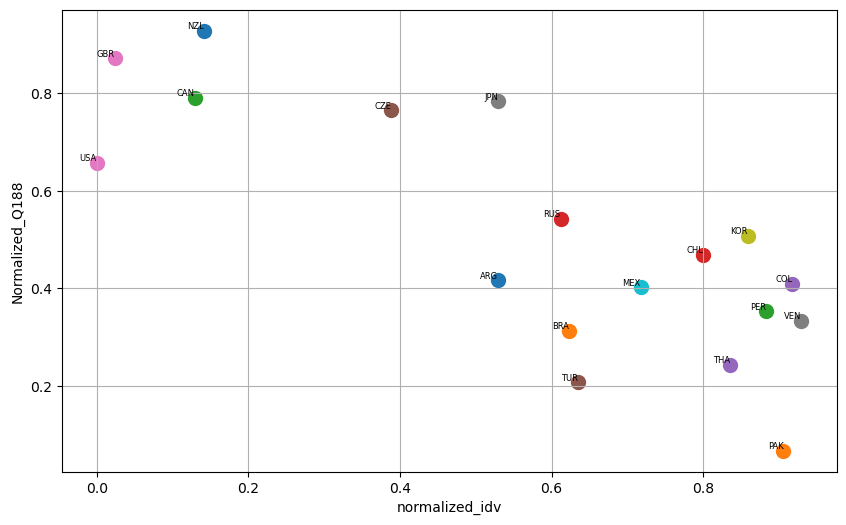

In [37]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['Normalized_Q188'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['Normalized_Q188'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('Normalized_Q188')



# Show the plot
plt.grid()